In [50]:
# 0. Przygotowanie danych

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


df = pd.read_csv('data.csv')
numeryczne_kolumny = ['age', 'income', 'outcome']
numeryczny_df = df[numeryczne_kolumny]

if numeryczny_df.isnull().sum().any():
    numeryczny_df.fillna(numeryczny_df.mean(), inplace=True)

In [51]:
# 1. W Pythonie, R oraz KNIME porównaj wyniki regresji liniowej, Ridge, sieci neuronowych na tym samym zbiorze danych.

# Features and target variable
X = df[['age', 'income', 'savings', 'children', 'credit_score', 'spending_score']]
y = df['outcome']

# Split data into training and testing sets
X_treningowe, X_testowe, y_treningowe, y_testowe = train_test_split(X, y, test_size=0.2, random_state=42)

# Liniowa regresja
lr = LinearRegression()
lr.fit(X_treningowe, y_treningowe)
przewidywany_y_lr = lr.predict(X_testowe)
mse_lr = mean_squared_error(y_testowe, przewidywany_y_lr)

# Regresja Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_treningowe, y_treningowe)
y_przewidywane_ridge = ridge.predict(X_testowe)
mse_ridge = mean_squared_error(y_testowe, y_przewidywane_ridge)

# Sieć neuronowa
siec_neuronowa = MLPRegressor(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
siec_neuronowa.fit(X_treningowe, y_treningowe)
y_przewidywane_siec_neuronowa = siec_neuronowa.predict(X_testowe)
mse_siec_neuronowa = mean_squared_error(y_testowe, y_przewidywane_siec_neuronowa)

print(f"Regresja liniowa: {mse_lr}")
print(f"Regresja Ridge: {mse_ridge}")
print(f"Sieć Neuronowa: {mse_siec_neuronowa}")


Regresja liniowa: 691179.2465348984
Regresja Ridge: 691210.1828397188
Sieć Neuronowa: 1920776.2044036984


c:\Programs\Pythonek\3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


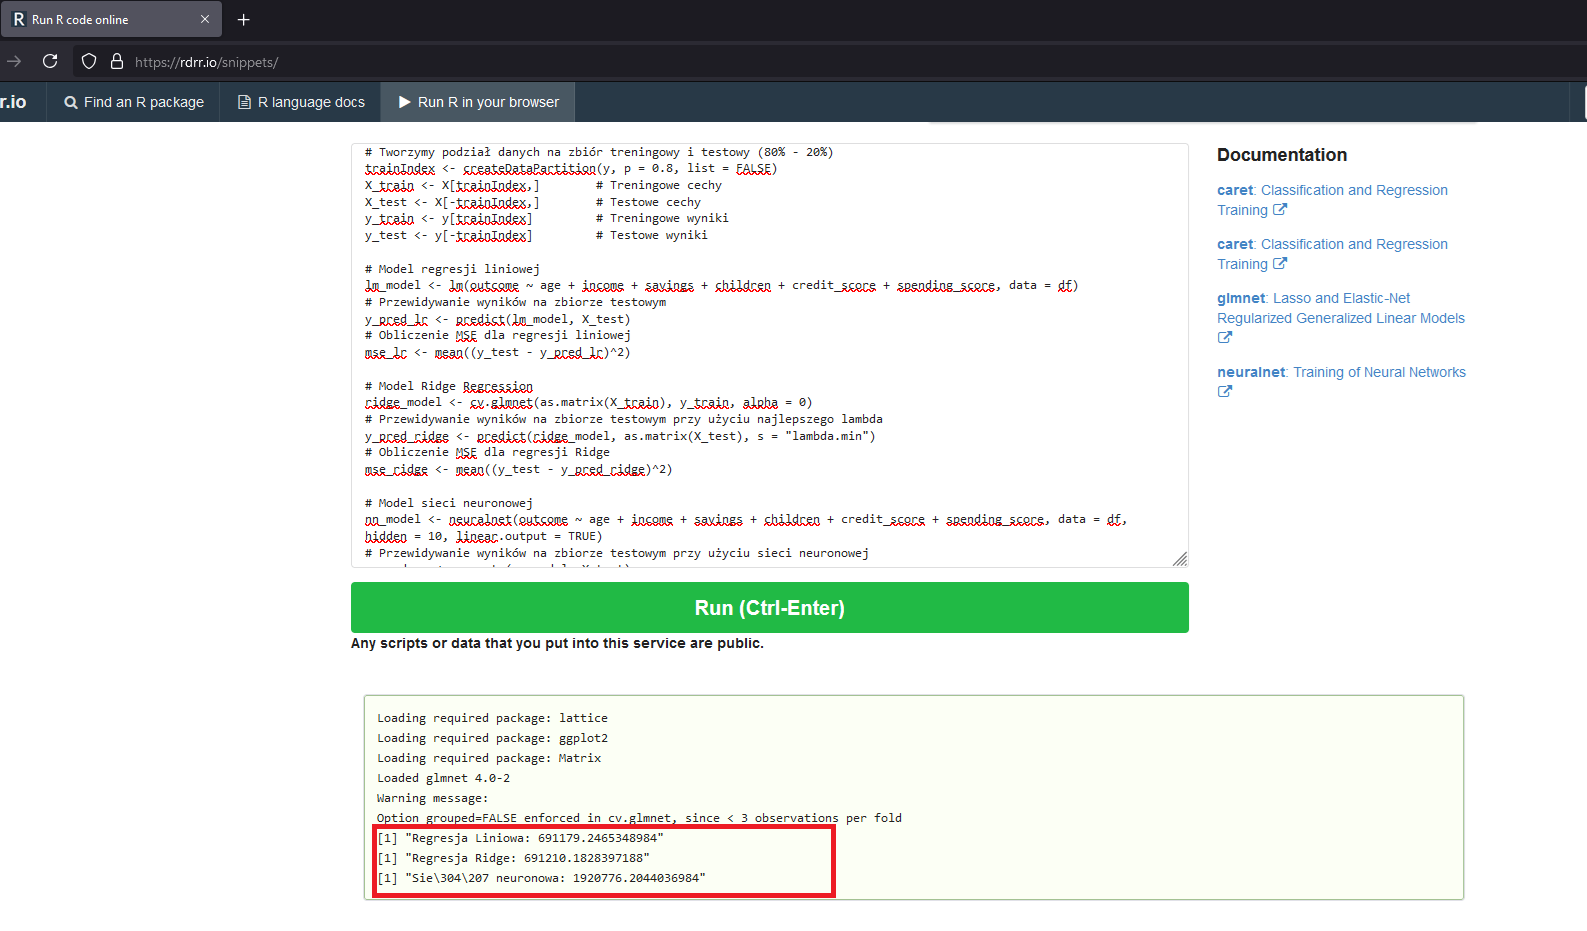

In [52]:
# 2. Zbadaj wpływ zmiennych objaśniających na predykcję (np. analiza ważności cech w Ridge).

model_rige_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), store_cv_values=True) # Model Ridge Regression (z cross-validation)
model_rige_cv.fit(X_treningowe, y_treningowe) # Dopasowanie modelu do danych treningowych
waznoscie = model_rige_cv.coef_ # Współczynniki ważności cech
nazwy_cech = X.columns

for feature, waznosc in zip(nazwy_cech, waznoscie): 
    print(f'Cecha: {feature}, ważność: {waznosc}') # Wyniki ważności cech

print(f"Optymalna lambda: {model_rige_cv.alpha_}") 

y_przewidywane_ridge = model_rige_cv.predict(X_testowe) # Predykcja na zbiorze testowym
mse_ridge = np.mean((y_testowe - y_przewidywane_ridge)**2) # Obliczenie MSE
print(f"Rgresja Ridge MSE: {mse_ridge}")

Cecha: age, ważność: -0.057750087287262775
Cecha: income, ważność: 0.06234187711480921
Cecha: savings, ważność: 0.00023841101034349776
Cecha: children, ważność: -0.001137729855721704
Cecha: credit_score, ważność: -0.18935665599223672
Cecha: spending_score, ważność: 0.09089194333596211
Optymalna lambda: 1000000.0
Rgresja Ridge MSE: 697888.813788741


c:\Programs\Pythonek\3.11\Lib\site-packages\sklearn\linear_model\_ridge.py:2375: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


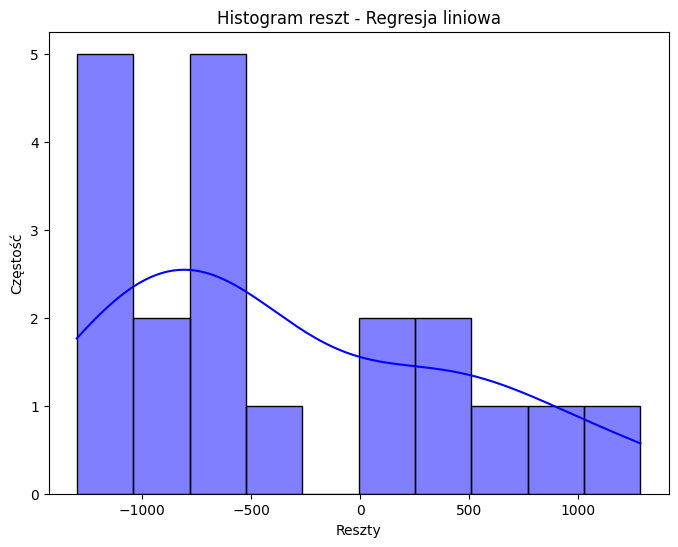

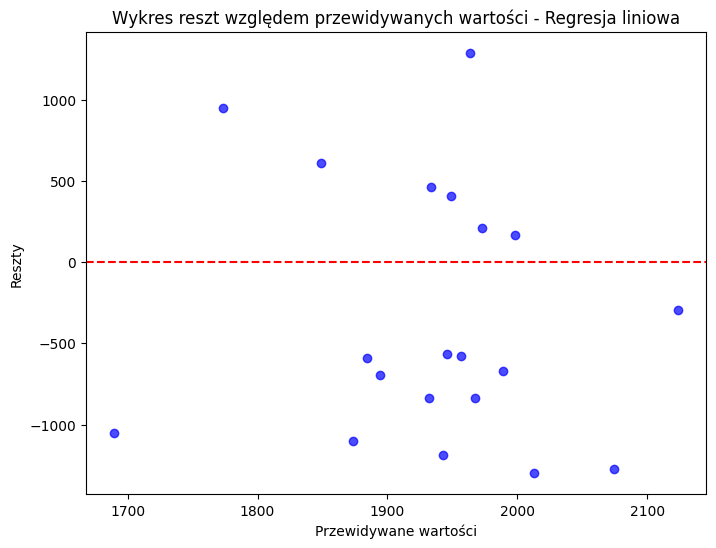

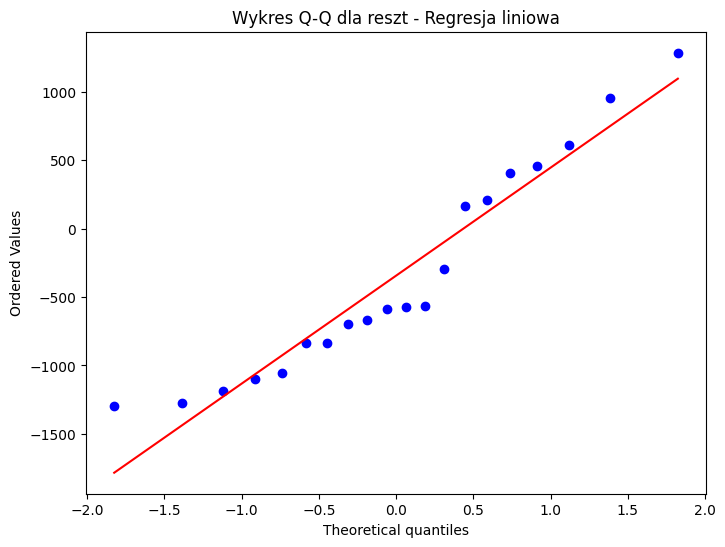

Mean Squared Error (MSE) dla regresji liniowej: 691179.25


In [53]:
# 3.  Wykonaj analizę reszt dla modelu regresji liniowej:

reszty = y_testowe - przewidywany_y_lr # Obliczenie reszt

# Histogram reszt
plt.figure(figsize=(8, 6))
sns.histplot(reszty, kde=True, bins=10, color='blue')
plt.title('Histogram reszt - Regresja liniowa')
plt.xlabel('Reszty')
plt.ylabel('Częstość')
plt.show()

# Wykres reszt względem przewidywanych wartości
plt.figure(figsize=(8, 6))
plt.scatter(przewidywany_y_lr, reszty, alpha=0.7, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Wykres reszt względem przewidywanych wartości - Regresja liniowa')
plt.xlabel('Przewidywane wartości')
plt.ylabel('Reszty')
plt.show()

# Normalność reszt - wykres Q-Q
plt.figure(figsize=(8, 6))
probplot(reszty, dist="norm", plot=plt)
plt.title('Wykres Q-Q dla reszt - Regresja liniowa')
plt.show()

# Średnia kwadratowa błędu (MSE) dla modelu regresji liniowej
print(f"Mean Squared Error (MSE) dla regresji liniowej: {mse_lr:.2f}")

In [54]:
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro

# 3.1. Sprawdzenie normalności reszt (Shapiro-Wilk)
shapiro_test_stat, shapiro_p_value = shapiro(reszty)
print("Test Shapiro-Wilka dla normalności reszt:")
print(f"Statystyka testowa: {shapiro_test_stat:.4f}, p-wartość: {shapiro_p_value:.4e}")

if shapiro_p_value > 0.05:
    print("Brak podstaw do odrzucenia hipotezy zerowej: reszty są normalnie rozłożone.")
else:
    print("Odrzucenie hipotezy zerowej: reszty nie są normalnie rozłożone.")

# 3.2. Test autokorelacji reszt (Durbin-Watson)
durbin_watson_stat = durbin_watson(reszty)
print("\nTest Durbin-Watson:")
print(f"Statystyka Durbin-Watson: {durbin_watson_stat:.4f}")

# Interpretacja wyników testu Durbin-Watson
if durbin_watson_stat < 1.5:
    print("Wskazanie na autokorelację dodatnią reszt.")
elif durbin_watson_stat > 2.5:
    print("Wskazanie na autokorelację ujemną reszt.")
else:
    print("Brak istotnej autokorelacji reszt.")

Test Shapiro-Wilka dla normalności reszt:
Statystyka testowa: 0.9184, p-wartość: 9.2441e-02
Brak podstaw do odrzucenia hipotezy zerowej: reszty są normalnie rozłożone.

Test Durbin-Watson:
Statystyka Durbin-Watson: 1.2083
Wskazanie na autokorelację dodatnią reszt.


In [55]:
from sklearn.preprocessing import StandardScaler
# 4. Porównaj jakość modeli przy użyciu danych o różnych skalach (np. znormalizowanych i oryginalnych).

# Przygotowanie danych
X = df[['age', 'income', 'savings', 'children', 'credit_score', 'spending_score']]
y = df['outcome']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Oryginalne dane
lr_orig = LinearRegression()
lr_orig.fit(X_train, y_train)
y_pred_lr_orig = lr_orig.predict(X_test)
mse_lr_orig = mean_squared_error(y_test, y_pred_lr_orig)

# 2. Znormalizowane dane
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regresja Liniowa (na znormalizowanych danych)
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred_lr_scaled = lr_scaled.predict(X_test_scaled)
mse_lr_scaled = mean_squared_error(y_test, y_pred_lr_scaled)

# Regresja Ridge (na obu zbiorach)
ridge_orig = Ridge(alpha=1.0)
ridge_orig.fit(X_train, y_train)
y_pred_ridge_orig = ridge_orig.predict(X_test)
mse_ridge_orig = mean_squared_error(y_test, y_pred_ridge_orig)

ridge_scaled = Ridge(alpha=1.0)
ridge_scaled.fit(X_train_scaled, y_train)
y_pred_ridge_scaled = ridge_scaled.predict(X_test_scaled)
mse_ridge_scaled = mean_squared_error(y_test, y_pred_ridge_scaled)

# Sieć neuronowa (na obu zbiorach)
nn_orig = MLPRegressor(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
nn_orig.fit(X_train, y_train)
y_pred_nn_orig = nn_orig.predict(X_test)
mse_nn_orig = mean_squared_error(y_test, y_pred_nn_orig)

nn_scaled = MLPRegressor(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
nn_scaled.fit(X_train_scaled, y_train)
y_pred_nn_scaled = nn_scaled.predict(X_test_scaled)
mse_nn_scaled = mean_squared_error(y_test, y_pred_nn_scaled)

# Porównanie wyników
print("Regresja Liniowa:")
print(f"- Oryginalne dane: MSE = {mse_lr_orig:.2f}")
print(f"- Znormalizowane dane: MSE = {mse_lr_scaled:.2f}")

print("\nRegresja Ridge:")
print(f"- Oryginalne dane: MSE = {mse_ridge_orig:.2f}")
print(f"- Znormalizowane dane: MSE = {mse_ridge_scaled:.2f}")

print("\nSieć Neuronowa:")
print(f"- Oryginalne dane: MSE = {mse_nn_orig:.2f}")
print(f"- Znormalizowane dane: MSE = {mse_nn_scaled:.2f}")

Regresja Liniowa:
- Oryginalne dane: MSE = 691179.25
- Znormalizowane dane: MSE = 691179.25

Regresja Ridge:
- Oryginalne dane: MSE = 691210.18
- Znormalizowane dane: MSE = 691336.81

Sieć Neuronowa:
- Oryginalne dane: MSE = 1920776.20
- Znormalizowane dane: MSE = 3074307.69


c:\Programs\Pythonek\3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programs\Pythonek\3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
